# Sine Wave Spectrum Analysis: DFT and Windowing Methods - Krzysztof Wąsik

Analyze the impact of window functions on the spectral content of sinusoidal signals. In this variant, three sinusoidal signals with very close frequencies are generated, three different windows (Rectangular, Hann, and Flattop) are applied, FFT spectra are computed with proper normalization, and the quasi-DTFT of the windows is presented. This allows us to see how windowing reduces spectral leakage.

**Parameters:**
- f₁ = 400 Hz
- f₂ = 400.25 Hz
- f₃ = 399.75 Hz
- Amplitude = 4
- Sampling frequency fs = 600 Hz
- Number of samples N = 3000

## 1. Signal Parameters Definition

Define the frequencies, amplitude, sampling frequency, and number of samples according to Variant 12.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft, fftshift
from scipy.signal.windows import hann, flattop

f1 = 400
f2 = 400.25
f3 = 399.75
A = 4
fs = 600
N = 3000

## 2. Generate Time Vector and Sine Signals

Create the time vector and generate three sine signals with the specified frequencies.

In [2]:
k = np.arange(N)

x1 = A * np.sin(2 * np.pi * f1 / fs * k)
x2 = A * np.sin(2 * np.pi * f2 / fs * k)
x3 = A * np.sin(2 * np.pi * f3 / fs * k)

## 3. Generate Composite Signal and Window Functions

The composite signal is obtained by summing the three sine signals. Generate three window functions of length N: Rectangular, Hann, and Flattop.

In [3]:
x = x1 + x2 + x3

w_rect = np.ones(N)
w_hann = hann(N, sym=False)
w_flattop = flattop(N, sym=False)

## 4. Visualize Window Functions

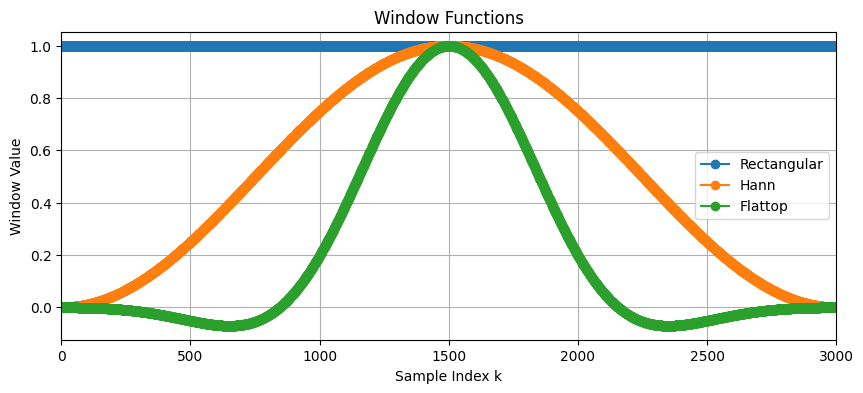

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(k, w_rect, 'C0o-', label='Rectangular')
plt.plot(k, w_hann, 'C1o-', label='Hann')
plt.plot(k, w_flattop, 'C2o-', label='Flattop')
plt.xlabel('Sample Index k')
plt.ylabel('Window Value')
plt.xlim(0, N)
plt.legend()
plt.title('Window Functions')
plt.grid(True)
plt.show()

## 5. FFT Normalization Function

Define a function to compute the FFT magnitude in dB with normalization for sinusoidal amplitudes.

In [5]:
def fft2db(X):
    N_fft = X.size
    Xtmp = 2 / N_fft * X.copy()
    Xtmp[0] *= 0.5
    if N_fft % 2 == 0:
        Xtmp[N_fft//2] /= 2
    return 20 * np.log10(np.abs(Xtmp))

## 6. Construct Frequency Vector

In [6]:
df = fs / N
f_vec = np.arange(N) * df

## 7. Compute FFT Spectra with Each Window

In [7]:
X_rect = fft(x * w_rect)
X_hann = fft(x * w_hann)
X_flattop = fft(x * w_flattop)

## 8. Plot Normalized FFT Spectra

Plot the normalized FFT spectra for each window in the frequency range 390 Hz to 410 Hz.

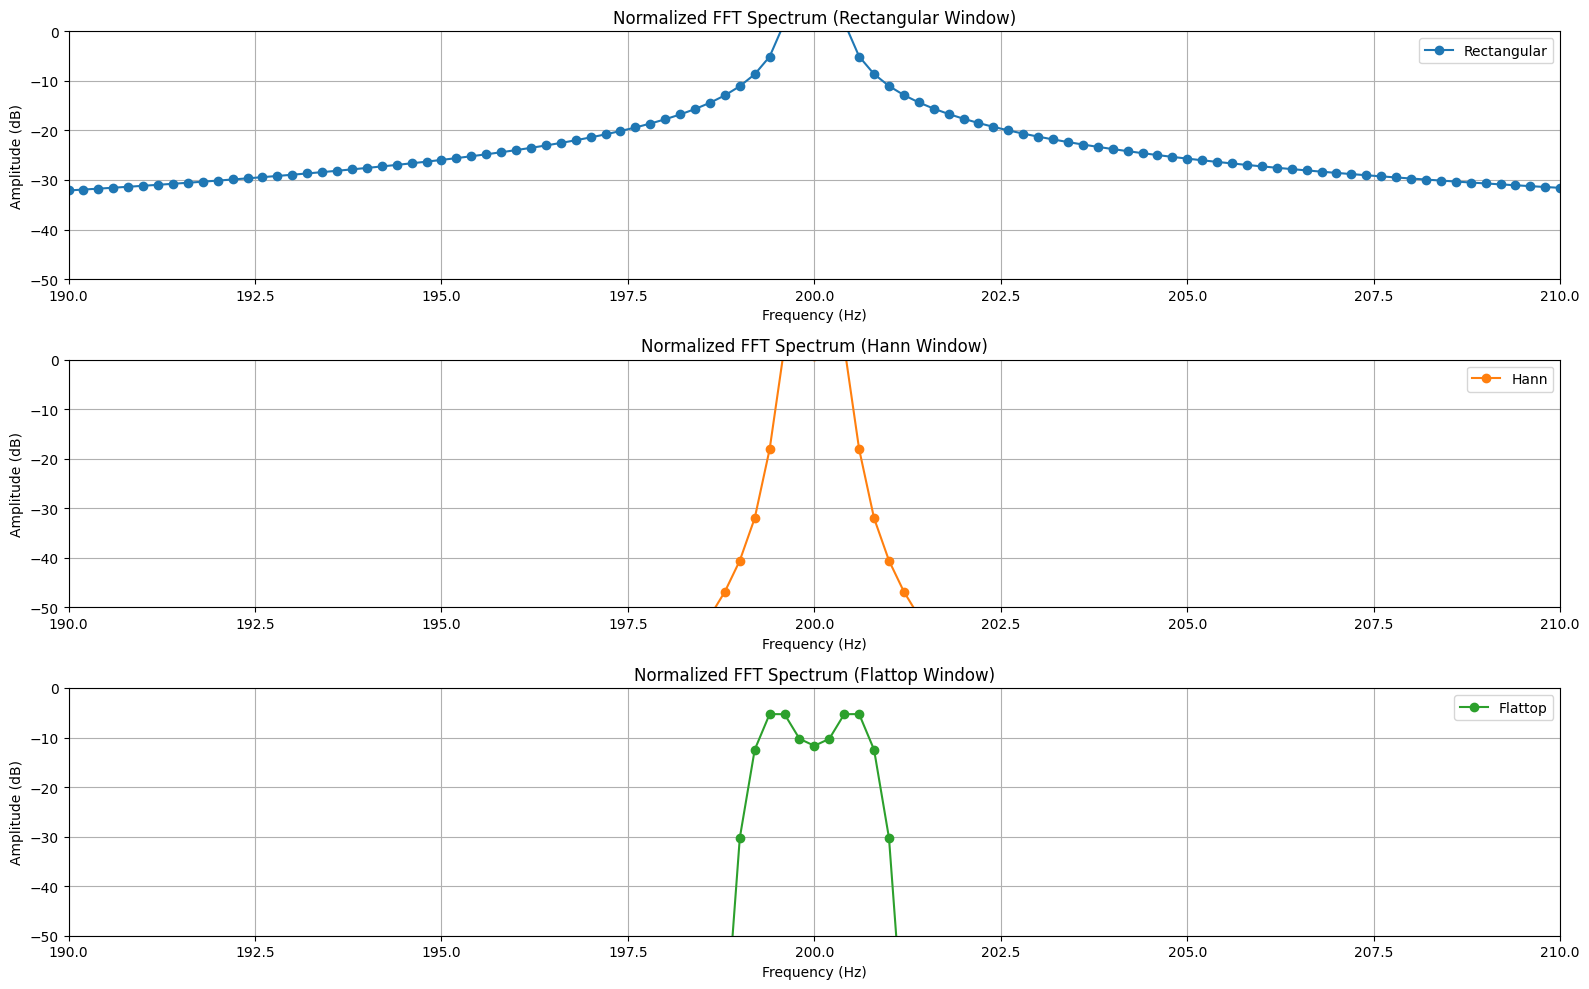

In [13]:
f_min = 190
f_max = 210
half = N // 2
plt.figure(figsize=(16, 10))

plt.subplot(3, 1, 1)
plt.plot(f_vec[:half], fft2db(X_rect)[:half], 'C0o-', label='Rectangular')
plt.xlim(f_min, f_max)
plt.ylim(-50, 0)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Normalized FFT Spectrum (Rectangular Window)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(f_vec[:half], fft2db(X_hann)[:half], 'C1o-', label='Hann')
plt.xlim(f_min, f_max)
plt.ylim(-50, 0)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Normalized FFT Spectrum (Hann Window)')
plt.grid(True)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(f_vec[:half], fft2db(X_flattop)[:half], 'C2o-', label='Flattop')
plt.xlim(f_min, f_max)
plt.ylim(-50, 0)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Normalized FFT Spectrum (Flattop Window)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

## 9. Compute Quasi-DTFT of Window Functions

Define a function to compute the quasi-DTFT of a window using zero-padding for high frequency resolution.

In [14]:
def winDTFTdB(w):
    N_w = w.size
    Nz = 100 * N_w
    W = np.zeros(Nz)
    W[:N_w] = w
    W = np.abs(fftshift(fft(W)))
    W = W / np.max(W)
    W_db = 20 * np.log10(W)
    Omega = 2 * np.pi / Nz * np.arange(Nz) - np.pi
    return Omega, W_db

## 10. Compute DTFT of Windows

Compute the quasi-DTFT for the Rectangular, Hann, and Flattop windows.

In [15]:
Omega_rect, W_rect_db = winDTFTdB(w_rect)
Omega_hann, W_hann_db = winDTFTdB(w_hann)
Omega_flattop, W_flattop_db = winDTFTdB(w_flattop)

/tmp/ipykernel_15249/3599216371.py:8: RuntimeWarning: divide by zero encountered in log10
  W_db = 20 * np.log10(W)


## 11. Plot DTFT Spectra

Plot the DTFT spectra of the window functions over the full digital frequency range and zoomed in on the mainlobe.

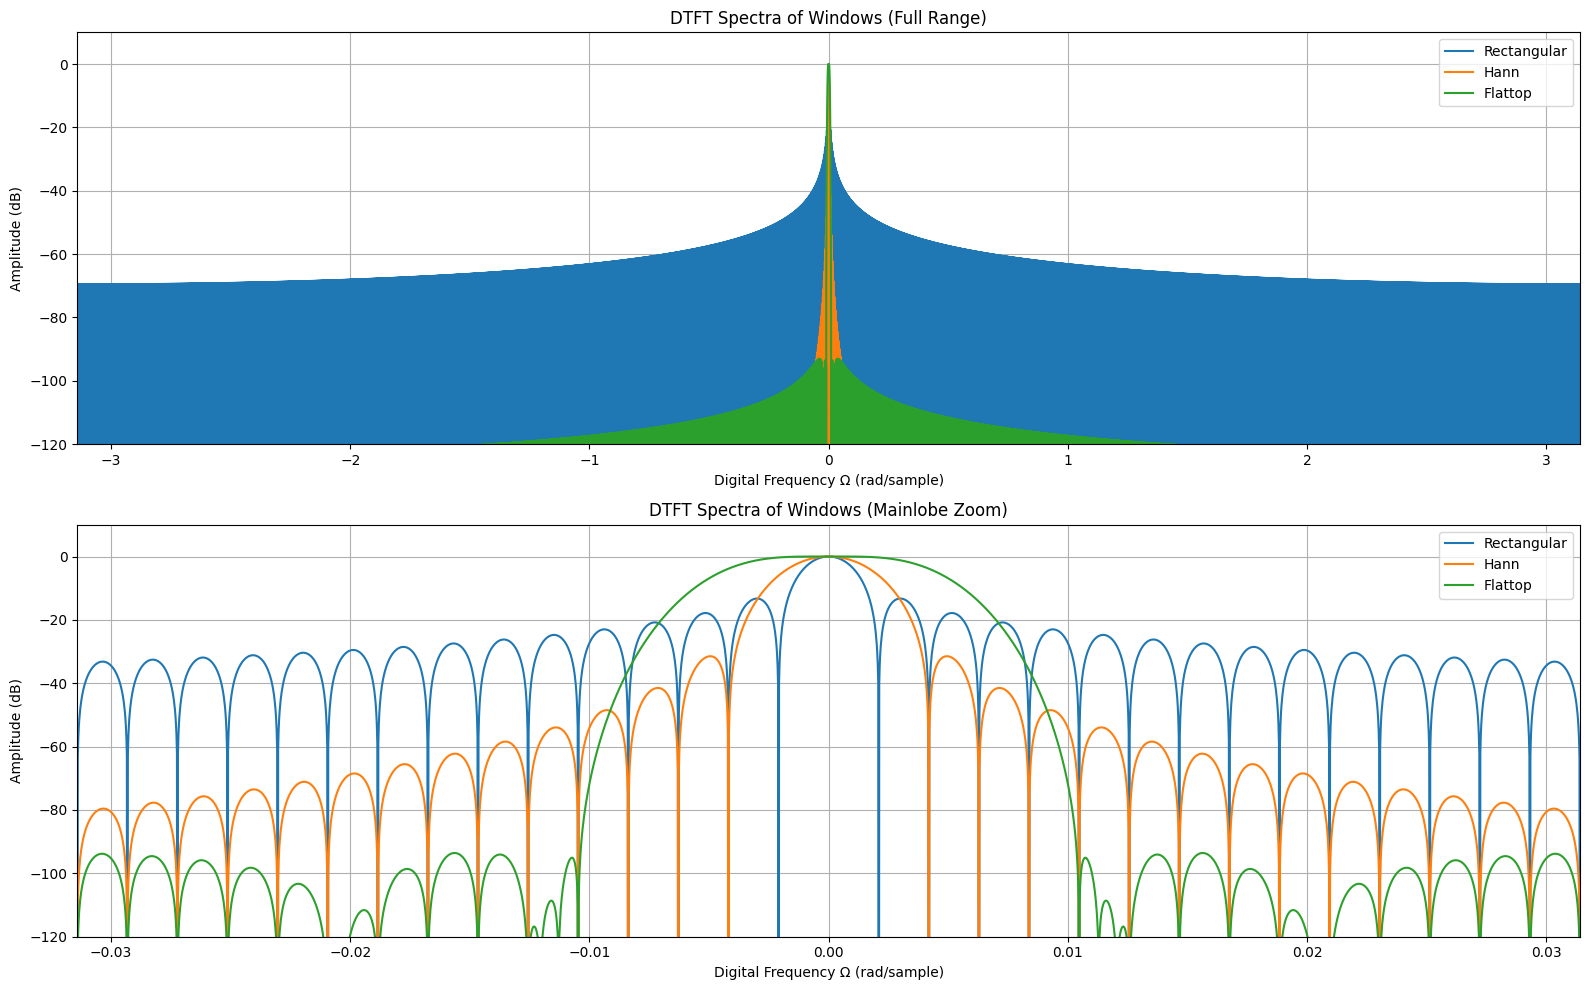

In [16]:
plt.figure(figsize=(16, 10))

plt.subplot(2, 1, 1)
plt.plot(Omega_rect, W_rect_db, label='Rectangular')
plt.plot(Omega_hann, W_hann_db, label='Hann')
plt.plot(Omega_flattop, W_flattop_db, label='Flattop')
plt.xlabel('Digital Frequency Ω (rad/sample)')
plt.ylabel('Amplitude (dB)')
plt.title('DTFT Spectra of Windows (Full Range)')
plt.xlim(-np.pi, np.pi)
plt.ylim(-120, 10)
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(Omega_rect, W_rect_db, label='Rectangular')
plt.plot(Omega_hann, W_hann_db, label='Hann')
plt.plot(Omega_flattop, W_flattop_db, label='Flattop')
plt.xlabel('Digital Frequency Ω (rad/sample)')
plt.ylabel('Amplitude (dB)')
plt.title('DTFT Spectra of Windows (Mainlobe Zoom)')
plt.xlim(-np.pi/100, np.pi/100)
plt.ylim(-120, 10)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## **12. Conclusion**  
Different windows affect the trade-off between frequency resolution and spectral leakage. The rectangular window offers high resolution but suffers from high leakage, while Hann and Flattop windows reduce leakage at the expense of resolution.

The 400 Hz signal (f₁) is perfectly centered in an FFT bin, minimizing leakage. In contrast, the 400.25 Hz signal (f₂) is off-center, causing energy to spread into adjacent bins. This results in a lower, more diffused amplitude peak, making it harder to distinguish from nearby frequencies, especially when using windows with wider main lobes.